In [19]:
#Gerekli kütüphaneleri import ettim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [20]:
data=pd.read_csv("Churn_Modelling.csv")#Datayı hazırladım
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#Modeli kötü etkileyecek değişkenleri datadan kaldırdım
data.drop("RowNumber",axis=1,inplace=True)
data.drop("CustomerId",axis=1,inplace=True)
data.drop("Surname",axis=1,inplace=True)
data.drop("EstimatedSalary",axis=1,inplace=True)
  

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [23]:
data.isnull().sum()#Data'da boş değer olup olmadığını gösteriyor

CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
Balance           0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
Exited            0
dtype: int64

In [24]:
#Label Encoder->Kategorik veriyi sayısal veriye çevirdim
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data["Geography"]=le.fit_transform(data["Geography"])
data["Gender"]=le.fit_transform(data["Gender"])
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,0,0,42,2,0.00,1,1,1,1
1,608,2,0,41,1,83807.86,1,0,1,0
2,502,0,0,42,8,159660.80,3,1,0,1
3,699,0,0,39,1,0.00,2,0,0,0
4,850,2,0,43,2,125510.82,1,1,1,0


In [25]:
x=data.drop("Exited",axis=1)#Bağımsız değişken
y=data["Exited"]#Bağımlı değişken

#Model hakkında birbirinden değerli bilgilerin incelenmesi;
import statsmodels.api as sm
model=sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Exited   R-squared (uncentered):                   0.312
Model:                            OLS   Adj. R-squared (uncentered):              0.311
Method:                 Least Squares   F-statistic:                              502.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                        0.00
Time:                        23:20:39   Log-Likelihood:                         -4366.5
No. Observations:               10000   AIC:                                      8751.
Df Residuals:                    9991   BIC:                                      8816.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [26]:
#Eğitim ve test kümesi olmak üzere veriyi ayırdım
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

#Standrlize edittim->verileri aynı dünyaya indirgedim
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)#x_train'i öğren ve uygula
x_test=sc.transform(x_test)#x_test'i sadece uygula

In [27]:
#Logistic Regression;
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2338   78]
 [ 480  104]]


In [28]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2376   40]
 [ 404  180]]


In [29]:
#SVC-(support vector machine)
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2366   50]
 [ 362  222]]


In [30]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2365   51]
 [ 435  149]]


In [31]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="entropy")
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2084  332]
 [ 270  314]]


In [32]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=10)
rc.fit(x_train,y_train)
y_pred=rc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2295  121]
 [ 316  268]]


In [33]:
#XGBRF Classifier
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2323   93]
 [ 319  265]]


In [34]:
x.shape

(10000, 9)

In [35]:
#Yapay sinir ağları
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()#Model oluşturdum
#Gizli katmanları ekledim
model.add(Dense(9,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="mse",metrics=['accuracy'])#modeli tamamlama işlemi
model.fit(x_train,y_train,epochs=20)#modeli eğittim


Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1951 - accuracy: 0.7549
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.7924
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.7921
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.7921
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.7926
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.7926
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.8140
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.8244
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.8316
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.8329

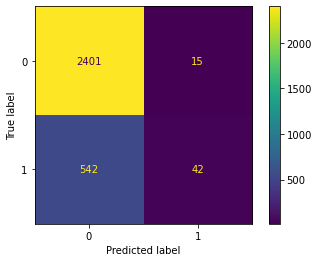

In [36]:
#Boyut indirgeme işlemi;
from sklearn.decomposition import PCA
pca=PCA(n_components=4)#En uygun 4 bağımsız değişkeni seç
x_train2=pca.fit_transform(x_train)
x_test2=pca.transform(x_test)
xgb=XGBRFClassifier()
xgb.fit(x_train2,y_train)
y_pred=xgb.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
tabl=ConfusionMatrixDisplay(cm)
tabl.plot()
plt.show()